In [32]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [5]:
df = pd.read_csv('./ETL/data_product.csv')

df.head()

,products,rating,price,features,battery,connectivity,gps,screen_size,img_url,brand
0,Amazfit Bip 6,4.5,74.99,"Multisport Tracker, Text Messaging, AI Assista...",340.0,Bluetooth,1.0,1.97,https://m.media-amazon.com/images/I/61UvVTN0IE...,Amazfit
1,Amazfit Active 2,4.5,75.99,"Multisport Tracker, Text Messaging, AI Assista...",270.0,Bluetooth,1.0,1.32,https://m.media-amazon.com/images/I/71mpuO4Lqe...,Amazfit
2,Amazfit T-Rex 3,4.4,189.99,"Maps, Altitude Assistant, Compass, dual-band G...",0.0,"Bluetooth, Wi-Fi",1.0,1.50,https://m.media-amazon.com/images/I/71GtgMbKvK...,Amazfit
3,Amazfit Active 2,4.5,94.99,"Multisport Tracker, Text Messaging, AI Assista...",270.0,Bluetooth,1.0,1.32,https://m.media-amazon.com/images/I/71XpjL4qkP...,Amazfit
4,Amazfit Active 2,4.5,75.99,"Multisport Tracker, Text Messaging, AI Assista...",270.0,Bluetooth,1.0,1.32,https://m.media-amazon.com/images/I/71XpjL4qkP...,Amazfit


## Brand

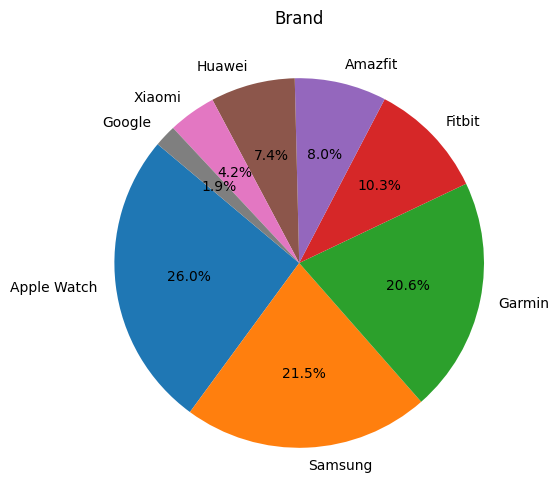

In [ ]:
# Pie chart brand yang ada
brand_counts = df['brand'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Brand')
plt.show()

## Distribusi Harga

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.histplot(df['price'], kde=True, ax=axs[0]).set(title='Distribusi Harga')
sns.histplot(df['rating'], kde=True, ax=axs[1]).set(title='Distribusi Rating')
plt.tight_layout()
plt.show()

## Rerata Harga

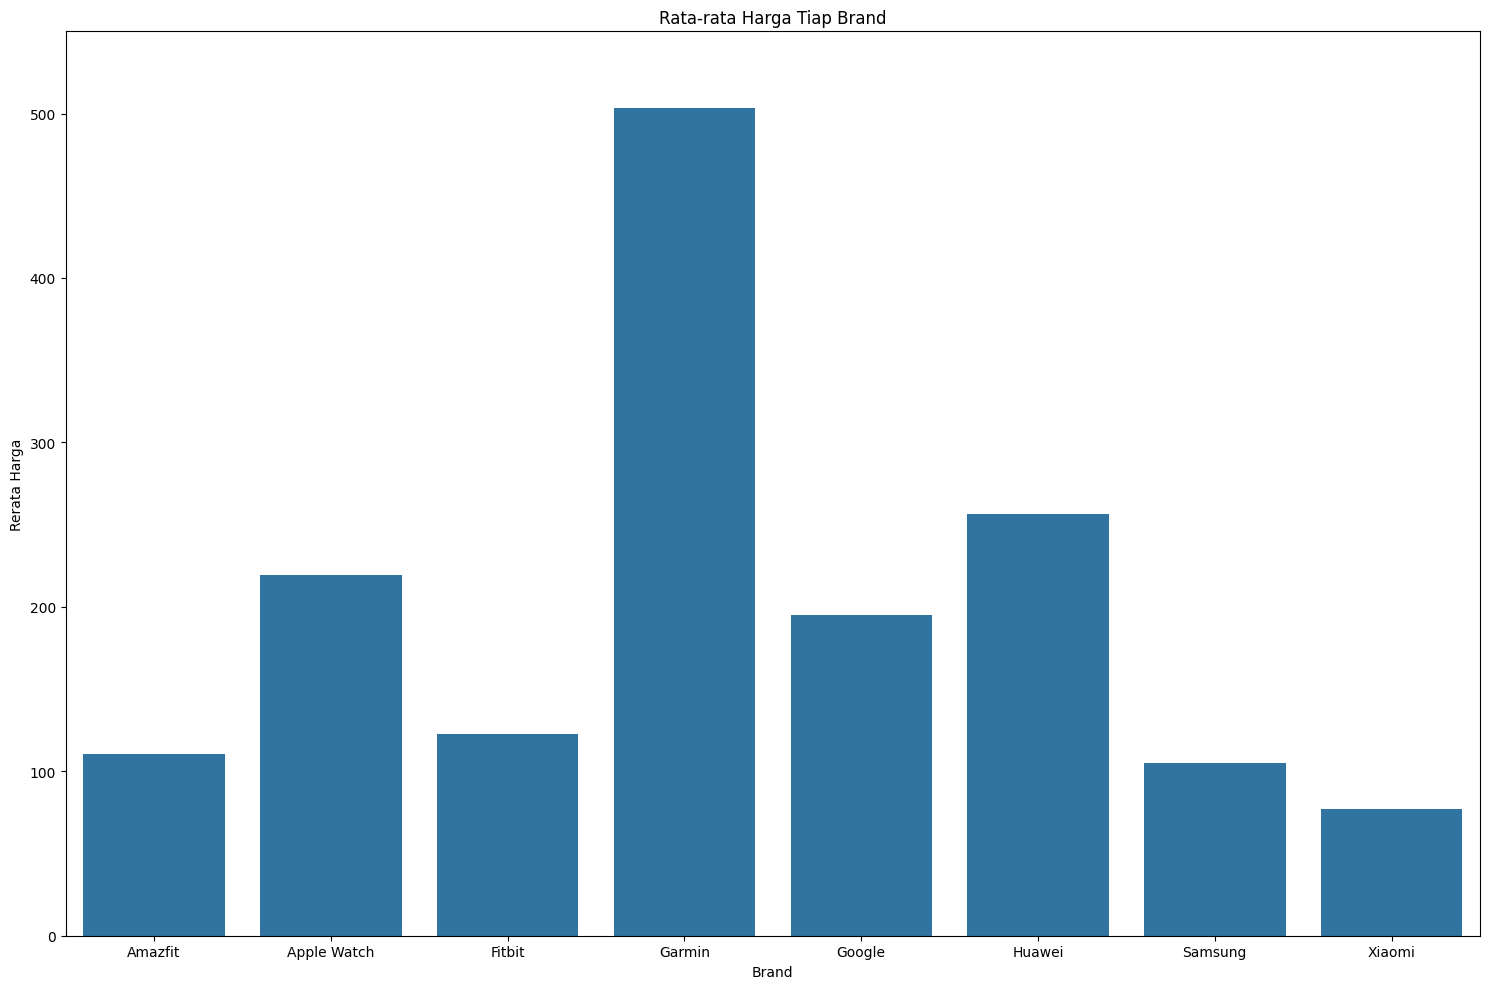

In [ ]:
# Vertikal plot untuk rerata harga
rerata_harga = df.groupby('brand')['price'].mean().round(2)

plt.figure(figsize=(15,10))
sns.barplot(x=rerata_harga.index, y=rerata_harga)
plt.title('Rata-rata Harga Tiap Brand')
plt.xlabel('Brand')
plt.ylabel('Rerata Harga')
plt.ylim(0,550)
plt.tight_layout()
plt.show()

## Rerata Rating

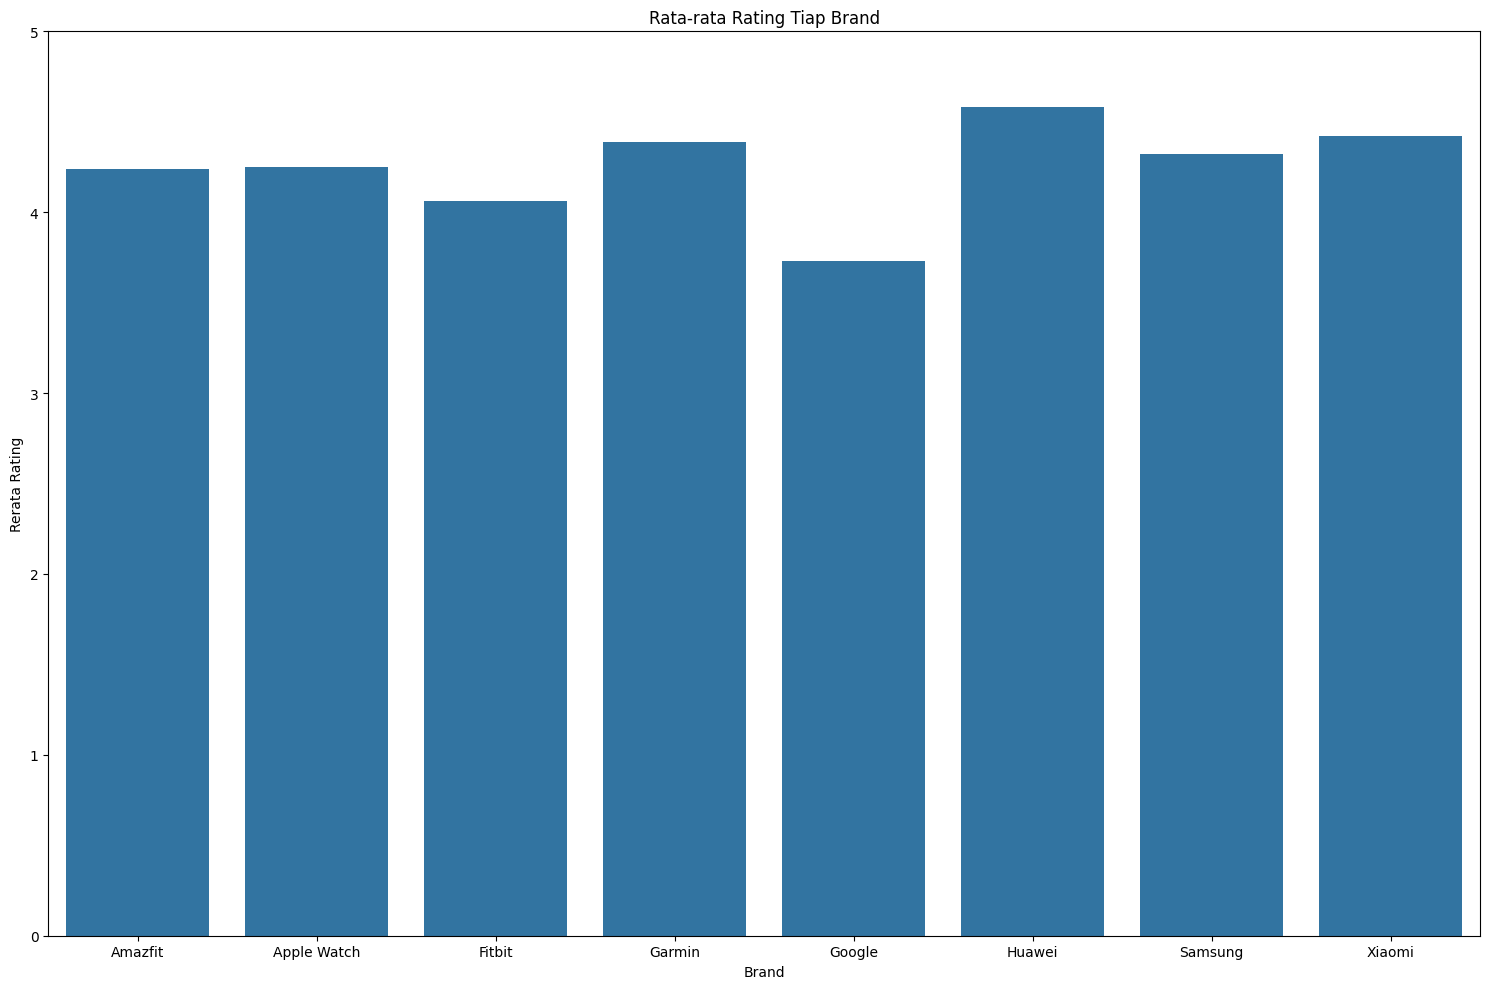

In [ ]:
# Vertical plot untuk rating

rerata_rating = df.groupby('brand')['rating'].mean().round(2)

plt.figure(figsize=(15,10))
sns.barplot(x=rerata_rating.index, y=rerata_rating)
plt.title('Rata-rata Rating Tiap Brand')
plt.xlabel('Brand')
plt.ylabel('Rerata Rating')
plt.ylim(0,5)
plt.tight_layout()
plt.show()

## Top 5 Connectivity

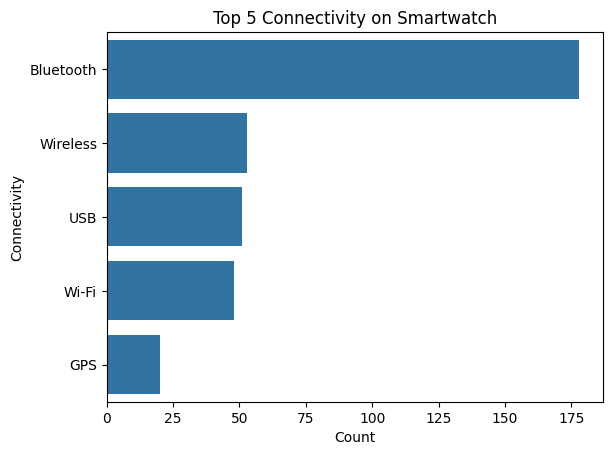

In [ ]:
# List konektivitas

all_connectivity = df['connectivity'].dropna().str.split(', ').sum()
connectivity_counts = Counter(all_connectivity)

# Menampilkan 5 konektivitas paling banyak

connectivity_df = pd.DataFrame(connectivity_counts.most_common(5), columns=['Connectivity', 'Count'])

# Horizontal Plot

sns.barplot(data=connectivity_df, x='Count', y='Connectivity')
plt.title('Top 5 Connectivity on Smartwatch')
plt.show()


## Price VS Screen Size VS Rating

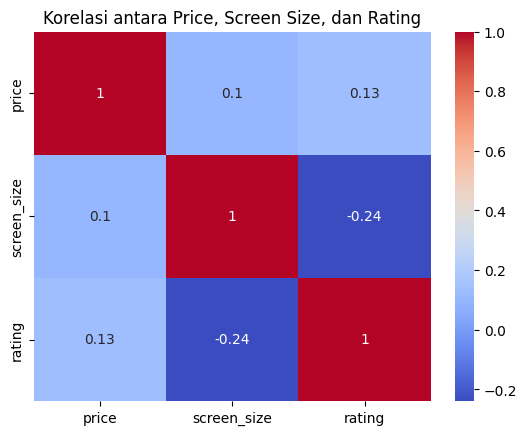

In [ ]:
# Heatmap

sns.heatmap(df[['price', 'screen_size', 'rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Price, Screen Size, dan Rating')
plt.show()


## Top 10 Features

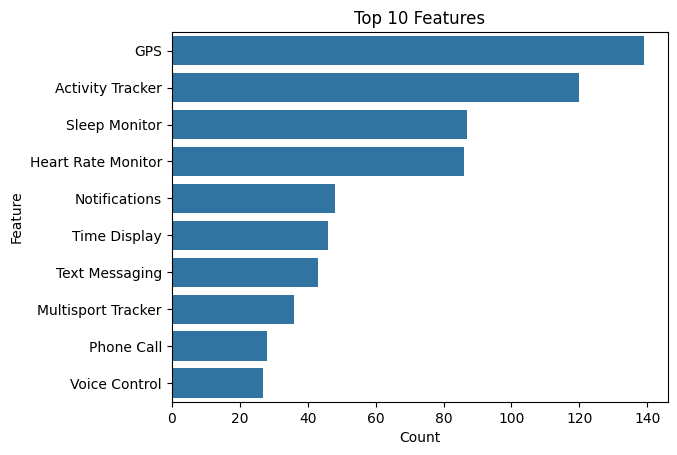

In [44]:
# List fitur

all_features = df['features'].dropna().str.split(', ').sum()
feature_counts = Counter(all_features)

# Menampilkan 10 fitur paling sering muncul

feature_df = pd.DataFrame(feature_counts.most_common(10), columns=['Feature', 'Count'])

# Horizontal Plot

sns.barplot(data=feature_df, x='Count', y='Feature')
plt.title('Top 10 Features')
plt.show()
